<a href="https://colab.research.google.com/github/mridul-eecs/AOA_USB_STM32F4/blob/master/irisrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/thuyngch/Iris-Recognition-PyTorch.git
!git clone https://github.com/thuyngch/Iris-Recognition

Cloning into 'Iris-Recognition-PyTorch'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 204 (delta 103), reused 153 (delta 53), pack-reused 0
Receiving objects: 100% (204/204), 1.00 MiB | 2.43 MiB/s, done.
Resolving deltas: 100% (103/103), done.
Cloning into 'Iris-Recognition'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 3896 (delta 1), reused 0 (delta 0), pack-reused 3889
Receiving objects: 100% (3896/3896), 71.56 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (1818/1818), done.
Checking out files: 100% (1826/1826), done.


In [0]:
!git clone https://github.com/Tony607/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


from efficientnet import EfficientNetB0 as Net
from efficientnet import center_crop_and_resize, preprocess_input

Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 171 (delta 98), reused 161 (delta 93), pack-reused 0
Receiving objects: 100% (171/171), 5.44 MiB | 3.41 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/efficientnet_keras_transfer_learning


Using TensorFlow backend.


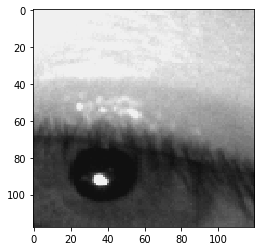

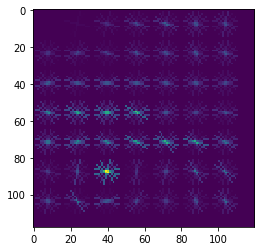

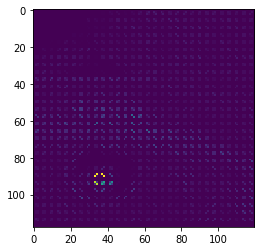

In [0]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog


def preprocess(filepath):
  img= cv2.imread(filepath)
  sx= img.shape[0]
  sy= img.shape[1]
  cropsizex= 60
  cropsizey= 100
  img= img[ 0+cropsizex:sx-cropsizex , 0+cropsizey:sy-cropsizey , :]
  plt.imshow(img)
  plt.show()
  plt.figure()
  fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
  plt.imshow(hog_image)
  plt.show()
  plt.figure()
  fd, hog_image = hog(img, orientations=20, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
  plt.imshow(hog_image)
  plt.show()

preprocess("/content/Iris-Recognition/MMU2/4/040202.bmp")

In [0]:
import os
import random, math
from tqdm import tqdm_notebook as tqdm

base= '/content/Iris-Recognition/MMU2'
subjects= os.listdir(base)
os.system("mkdir /content/test".format(base))
os.system("mkdir /content/train".format(base))
for a in tqdm(subjects):
  os.system("mkdir /content/test/{}".format(a))
  os.system("mkdir /content/train/{}".format(a))
  files= os.listdir(os.path.join(base, a))
  filestest= random.choices(files, k= int(len(files)/2))
  filestrain= [x for x in files if x not in filestest] 
  for b in filestest:
    print("cp {}/{}/{} /content/test/{}/".format(base, a, b, a))
    filepath= "{}/{}/{}".format(base, a, b)
    preprocess(filepath)
    break
  break

  # for b in filestest:
  #   os.system("cp {}/{}/{} /content/test/{}/".format(base, a, b, a))
  # for b in filestrain:
  #   os.system("cp {}/{}/{} /content/train/{}/".format(base, a, b, a))

cp /content/Iris-Recognition/MMU2/3/030202.bmp /content/test/3/



In [0]:

for a in os.listdir('/content/train'):
  print(len(os.listdir('/content/train/' + a)), end= " ")
print("")
for a in os.listdir('/content/test'):
  print(len(os.listdir('/content/test/' + a)), end= " ")
    

7 6 5 6 6 7 6 6 5 5 7 7 6 5 6 6 5 5 7 6 5 6 6 5 6 6 6 7 5 6 5 5 6 6 7 5 6 7 7 6 6 6 6 5 6 5 5 6 6 7 6 5 6 5 6 6 6 7 6 5 5 5 6 6 5 8 6 6 5 6 5 6 6 6 6 6 7 5 6 5 6 6 6 5 6 6 7 5 5 6 7 6 3 6 5 6 5 6 6 6 
3 4 5 4 4 3 4 4 5 5 3 3 4 5 4 4 5 5 3 4 5 4 4 5 4 4 4 3 5 4 5 5 4 4 3 5 4 3 3 4 4 4 4 5 4 5 5 4 4 3 4 5 4 5 4 4 4 3 4 5 5 5 4 4 5 2 4 4 5 4 5 4 4 4 4 4 3 5 4 5 4 4 4 5 4 4 3 5 5 4 3 4 2 4 5 4 5 4 4 4 

In [0]:
# Hyper parameters
batch_size = 48
width = 150
height = 150
epochs = 20
NUM_TRAIN = 2000
NUM_TEST = 1000
dropout_rate = 0.2
input_shape = (height, width, 3)

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# loading pretrained conv base model
conv_base = Net(weights="imagenet", include_top=False, input_shape=input_shape)
dropout_rate = 0.2
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
# model.add(layers.Flatten(name="flatten"))
if dropout_rate > 0:
    model.add(layers.Dropout(dropout_rate, name="dropout_out"))
# model.add(layers.Dense(256, activation='relu', name="fc1"))
model.add(layers.Dense(100, activation="softmax", name="fc_out"))

# conv_base.trainable = False
# (global_pool): SelectAdaptivePool2d (output_size=1, pool_type=avg)
# (classifier): Linear(in_features=1280, out_features=100, bias=True)
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
16719872/16717576 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 5, 5, 1280)        4049564   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
_________________________________________________________________
fc_out (Dense)               (None, 100)               128100    
Total params: 4,177,664
Trainable params: 4,135,648
Non-trainable params: 42,016
_________________________________________________________________


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    '/content/Iris-Recognition/MMU2',
    # All images will be resized to target height and width.
    target_size=(height, width),
    batch_size=batch_size,
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode="categorical",
)
validation_generator = test_datagen.flow_from_directory(
    '/content/Iris-Recognition/MMU2_test',
    target_size=(height, width),
    batch_size=batch_size,
    class_mode="categorical",
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(lr= 0.0001),
    metrics=['accuracy']
)


Found 585 images belonging to 100 classes.
Found 410 images belonging to 100 classes.


In [0]:
# from tensorflow.keras.utils import plot_model
# plot_model(conv_base, to_file='conv_base.png', show_shapes=True)
# from IPython.display import Image
# Image(filename='conv_base.png') 

In [0]:
import tensorflow as tf
history = model.fit_generator(
    train_generator,
    steps_per_epoch=NUM_TRAIN // batch_size,
    epochs=1000,
    validation_data=validation_generator,
    validation_steps=NUM_TEST // batch_size,
    verbose=1,
    callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

)

Epoch 1/1000
41/41 [==============================] - 40s 986ms/step - loss: 8.2871 - acc: 0.0184 - val_loss: 6.6863 - val_acc: 0.0273
Epoch 2/1000
41/41 [==============================] - 15s 362ms/step - loss: 6.2481 - acc: 0.0497 - val_loss: 6.0093 - val_acc: 0.0229
Epoch 3/1000
41/41 [==============================] - 15s 369ms/step - loss: 4.8300 - acc: 0.1258 - val_loss: 5.2162 - val_acc: 0.0524
Epoch 4/1000
41/41 [==============================] - 15s 370ms/step - loss: 3.8201 - acc: 0.2301 - val_loss: 4.3213 - val_acc: 0.1059
Epoch 5/1000
41/41 [==============================] - 15s 375ms/step - loss: 2.9237 - acc: 0.3144 - val_loss: 3.5273 - val_acc: 0.2336
Epoch 6/1000
41/41 [==============================] - 15s 376ms/step - loss: 2.2096 - acc: 0.4587 - val_loss: 3.2444 - val_acc: 0.2893
Epoch 7/1000
41/41 [==============================] - 16s 394ms/step - loss: 1.6506 - acc: 0.5565 - val_loss: 3.0616 - val_acc: 0.3002
Epoch 8/1000
41/41 [==============================] - 1

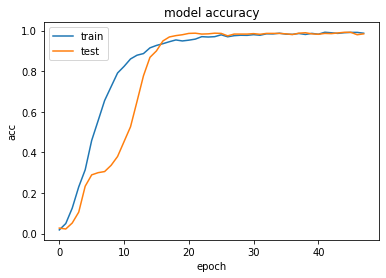

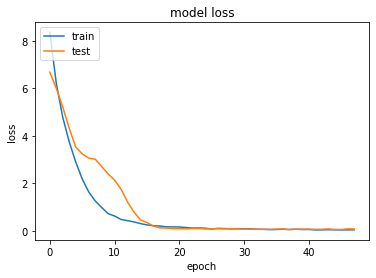

In [0]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('irismodel.h5')

In [0]:
from keras import Sequential
def grad_cam(input_model, image, category_index, layer_name):
    model = Sequential()
    model.add(input_model)

    nb_classes = 1000
    target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
    model.add(Lambda(target_layer,
                     output_shape = target_category_loss_output_shape))

    loss = K.sum(model.layers[-1].output)
    conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output
    grads = normalize(K.gradients(loss, conv_output)[0])
    gradient_function = K.function([model.layers[0].input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.ones(output.shape[0 : 2], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    #Return to BGR [0..255] from the preprocessed image
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    return np.uint8(cam), heatmap

In [0]:
os.listdir("/content/Iris-Recognition/MMU2_test/1/")

['010101.bmp', '010104.bmp', '010205.bmp', '010203.bmp']

In [0]:
import cv2
import numpy as np
testimage= cv2.imread("/content/Iris-Recognition/MMU2_test/1/010101.bmp")
testimage= cv2.resize(testimage, (150, 150))
predictions = model.predict(np.expand_dims(testimage, axis= 0))
# top_1 = decode_predictions(predictions)[0][0]
# print('Predicted class:')
# print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))
print(predictions)
subjects[np.argmax(predictions)]
# predicted_class = np.argmax(predictions)
# cam, heatmap = grad_cam(model, testimage, predicted_class, "conv2d_64")
# cv2.imwrite("gradcam.jpg", cam)

# register_gradient()
# guided_model = modify_backprop(model, 'GuidedBackProp')
# saliency_fn = compile_saliency_function(guided_model)
# saliency = saliency_fn([preprocessed_input, 0])
# gradcam = saliency[0] * heatmap[..., np.newaxis]
# cv2.imwrite("guided_gradcam.jpg", deprocess_image(gradcam))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


'8'

In [0]:
testimage= cv2.imread("/content/Iris-Recognition/MMU2_test/1/010203.bmp")
testimage= cv2.resize(testimage, (150, 150))
a= np.expand_dims(testimage, axis= 0)
a.shape

(1, 150, 150, 3)

(1, 238, 320, 3)

In [0]:
conv_base.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 75, 75, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
swish (Swish)                   (None, 75, 75, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________

In [0]:
from keras.applications.vgg16 import (
    VGG16, preprocess_input, decode_predictions)
_model = VGG16(weights='imagenet')
_model.summary()



553467904/553467096 [==============================] - 12s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________